# 8. Abschlussanalyse & Bericht

#### - Regionale Segmentierung
#### - Aktivitätsfilter
#### - Kundenprofilierung
#### - Strategische Analyse
#### - Mehrere exportierte Visualisierungen
#### - Finaler Datensatz

# 1. Bibliotheken und Daten importieren

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pfade
base_path = r"C:\Users\faink\Desktop\Achievement_4\02_Daten"
prepared_path = os.path.join(base_path, "Prepared_Daten")
plots_path = os.path.join(base_path, "Plots")

os.makedirs(plots_path, exist_ok=True)

# Finalen Datensatz laden (aus 4.9)
df = pd.read_pickle(os.path.join(prepared_path, "df_full_customers.pkl"))

df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,prices,spending_flag,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,9.0,Low spender,Nicht-häufiger Kunde,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,12.5,Low spender,Nicht-häufiger Kunde,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,4.4,Low spender,Nicht-häufiger Kunde,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,4.7,Low spender,Nicht-häufiger Kunde,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,1.0,Low spender,Nicht-häufiger Kunde,Female,Alabama,31,2019-02-17,3,married,40423


# 2. PII-Daten berücksichtigen

In [44]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'prices_x', 'spending_flag_x',
       'spending_flag_y', 'prices_y', 'prices', 'spending_flag',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'marital_status', 'income'],
      dtype='object')

Es wurden keine direkt identifizierbaren personenbezogenen Daten (PII) im Datensatz gefunden (wie z. B. 'first_name', 'last_name','email')

# 3. Regionale Segmentierung erstellen

In [46]:
df['state'].unique()

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', ..., 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Length: 51
Categories (51, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [11]:
# Region Mapping Dictionary
region_dict_full = {
    'California':'West','Oregon':'West','Washington':'West',
    'Texas':'South','Florida':'South','Georgia':'South',
    'New York':'Northeast','Pennsylvania':'Northeast',
    'Illinois':'Midwest','Ohio':'Midwest'
    # ggf. erweitern je nach deinen States
}

df['Region'] = df['state'].map(region_dict_full)

In [ ]:
## Visualisierung

spending_flag  High spender  Low spender
Region                                  
Midwest               24233      1238439
Northeast             20651      1283908
South                 40274      1887644
West                  39225      1891812


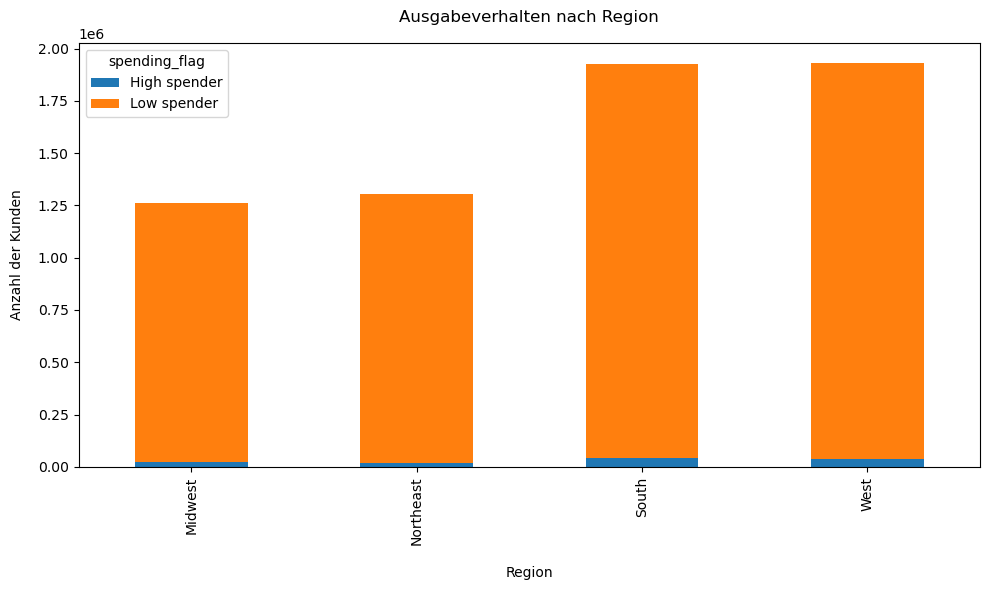

In [48]:
region_spending = pd.crosstab(df['Region'], df['spending_flag'])

print(region_spending)  

region_spending = region_spending.astype(float)

region_spending.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Ausgabeverhalten nach Region', pad=15)
plt.xlabel('Region', labelpad=15)
plt.ylabel('Anzahl der Kunden', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "spending_by_region.png"))
plt.show()

# 5. Ausschluss-Flag (weniger als 5 Bestellungen)

In [14]:
# Bestellanzahl pro Kunde
order_counts = df.groupby('user_id')['order_number'].max().reset_index()
order_counts['low_activity_flag'] = order_counts['order_number'] < 5

# Mergen
df = df.merge(order_counts[['user_id','low_activity_flag']], on='user_id')

# Nur aktive Kunden behalten
df_active = df[df['low_activity_flag'] == False]

In [ ]:
# Export

df_active.to_pickle(os.path.join(prepared_path, "df_active_customers.pkl"))

In [8]:
df_active.shape

(30996627, 26)

In [7]:
df_active.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,prices_x,prices_y,prices,age,date_joined,dependants,income
count,3.099663e+07,3.099663e+07,3.099663e+07,3.099663e+07,3.099663e+07,2.933359e+07,3.099663e+07,3.099663e+07,3.099663e+07,3.096771e+07,3.096771e+07,3.096771e+07,3.099663e+07,30996627,3.099663e+07,3.099663e+07
mean,1.710314e+06,1.029281e+05,1.783314e+01,2.741330e+00,1.341079e+01,1.081071e+01,2.557620e+04,8.361592e+00,6.061994e-01,1.193300e+01,1.193300e+01,1.193300e+01,4.946782e+01,2018-08-16 15:21:22.455240192,1.501826e+00,9.967399e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,2017-01-01 00:00:00,0.000000e+00,2.590300e+04
25%,8.554035e+05,5.140700e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,4.200000e+00,4.200000e+00,4.200000e+00,3.300000e+01,2017-10-22 00:00:00,1.000000e+00,6.728900e+04
50%,1.710393e+06,1.025830e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,7.400000e+00,7.400000e+00,7.400000e+00,4.900000e+01,2018-08-16 00:00:00,2.000000e+00,9.676500e+04
75%,2.565216e+06,1.543890e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.792700e+04,1.100000e+01,1.000000e+00,1.130000e+01,1.130000e+01,1.130000e+01,6.500000e+01,2019-06-09 00:00:00,3.000000e+00,1.281010e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,9.999900e+04,9.999900e+04,9.999900e+04,8.100000e+01,2020-04-01 00:00:00,3.000000e+00,5.939010e+05
std,9.873804e+05,5.947124e+04,1.763357e+01,2.089241e+00,4.248770e+00,8.578627e+00,1.409287e+04,7.134887e+00,4.885915e-01,4.913195e+02,4.913195e+02,4.913195e+02,1.848527e+01,NaN,1.118902e+00,4.314134e+04


# 6. Kundenprofilierung erstellen

In [15]:
# Erkennung leerer Werte

df_active[['age','income','dependants']].isnull().sum()

age           0
income        0
dependants    0
dtype: int64

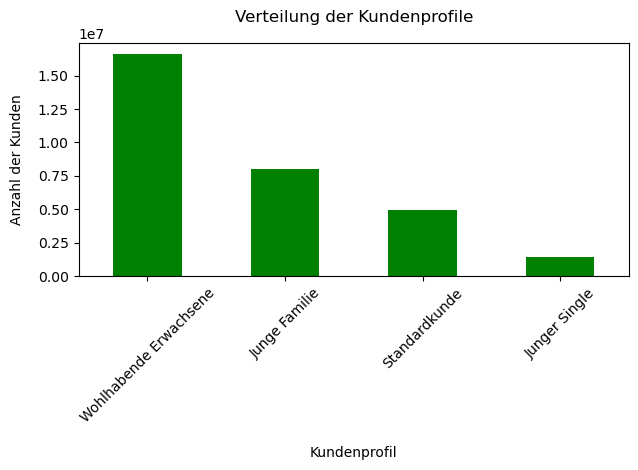

<Figure size 640x480 with 0 Axes>

In [16]:
# Erstellen einer Kopie des Datensatzes
df_active = df.loc[df['low_activity_flag'] == False].copy()


# Füllen Lücken
df_active.loc[:, 'age'] = df_active['age'].fillna(df_active['age'].median())
df_active.loc[:, 'income'] = df_active['income'].fillna(df_active['income'].median())
df_active.loc[:, 'dependants'] = df_active['dependants'].fillna(0)

# Profilierung
conditions = [
    (df_active['age'] < 30) & (df_active['dependants'] == 0),
    (df_active['age'] < 40) & (df_active['dependants'] > 0),
    (df_active['age'] >= 40) & (df_active['income'] > 80000)
]

choices = [
    'Junger Single',
    'Junge Familie',
    'Wohlhabende Erwachsene'
]

df_active.loc[:, 'customer_profile'] = np.select(
    conditions,
    choices,
    default='Standardkunde'
)

# Anzahl der Kunden
profile_counts = df_active['customer_profile'].value_counts()

# Visualisierung
plt.figure()
profile_counts.plot(kind='bar', color='green')

plt.title('Verteilung der Kundenprofile', pad=15)
plt.xlabel('Kundenprofil', labelpad=15)
plt.ylabel('Anzahl der Kunden', labelpad=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig(os.path.join(plots_path, "customer_profiles1.png"))

# 7. Profilverteilung visualisieren

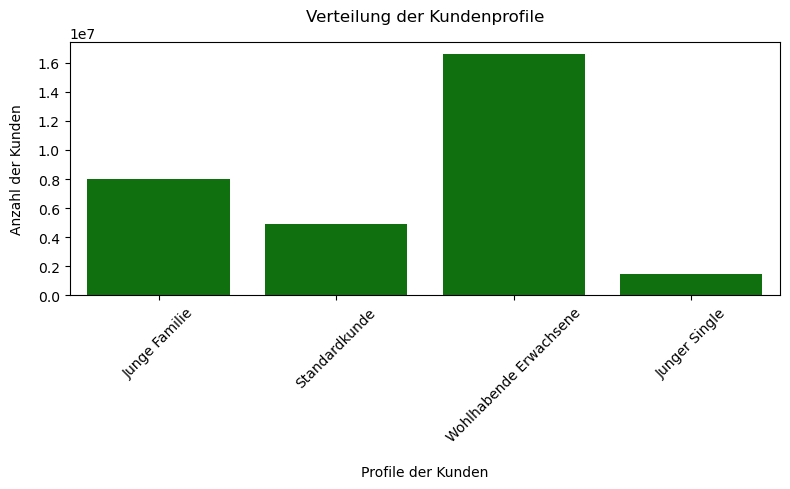

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_profile', data=df_active, color='green')
plt.xticks(rotation=45)
plt.title('Verteilung der Kundenprofile', pad=15)
plt.xlabel('Profile der Kunden', labelpad=15)
plt.ylabel('Anzahl der Kunden', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "customer_profiles.png"))
plt.show()

# 8. Aggregationen auf Profilebene

In [21]:
profile_stats = df_active.groupby('customer_profile').agg({
    'order_number':['min','mean','max'],
    'prices':['min','mean','max']
})

profile_stats

order_number                prices                    
                                min       mean max    min       mean      max
customer_profile                                                             
Junge Familie                     1  17.900536  99    1.0  12.102111  99999.0
Junger Single                     1  17.655747  99    1.0  12.579003  99999.0
Standardkunde                     1  17.507666  99    1.0   8.061830  99999.0
Wohlhabende Erwachsene            1  17.912355  99    1.0  12.939674  99999.0

# 9. Profile vs Region analysieren

In [22]:
profile_region = pd.crosstab(df_active['customer_profile'], df_active['Region'])
profile_region

Region,Midwest,Northeast,South,West
customer_profile,,,,
Junge Familie,309286,323707,487078,465753
Junger Single,59726,57060,89865,77897
Standardkunde,195235,199675,298308,313730
Wohlhabende Erwachsene,641050,668280,969082,988707


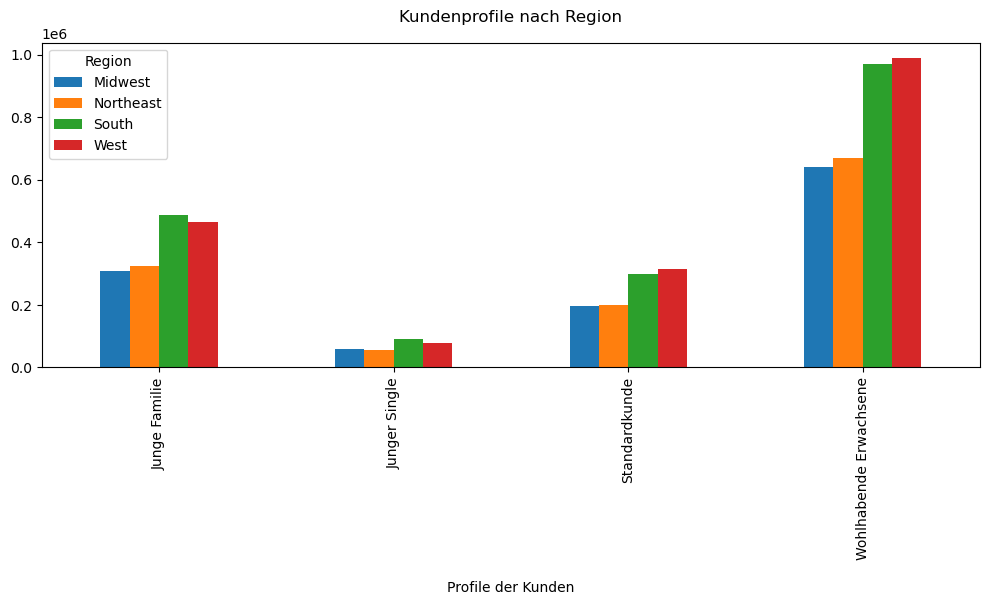

In [56]:
# Visialisierung

profile_region.plot(kind='bar', figsize=(10,6))
plt.title('Kundenprofile nach Region', pad=15)
plt.tight_layout()
plt.xlabel('Profile der Kunden', labelpad=15)
plt.savefig(os.path.join(plots_path, "profiles_by_region.png"))
plt.show()

Die Analyse zeigt, dass bestimmte Kundenprofile in bestimmten Regionen stärker vertreten sind.
Junge Familien sind häufiger im Süden vertreten, während wohlhabende Erwachsene häufiger im Westen vorkommen.

Zudem zeigen wohlhabende Erwachsene höhere durchschnittliche Ausgaben.
Regionale Unterschiede im Kaufverhalten können somit für gezielte Marketingkampagnen genutzt werden.

# 10. Finalen Datensatz exportieren

In [26]:
df_active.to_pickle(os.path.join(prepared_path, "df_final_4_10.pkl"))